In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from skimage.filters import threshold_multiotsu
import os
import porespy as ps
from tifffile import imwrite
from hydra.experimental import compose, initialize
from omegaconf import OmegaConf
import torch
from matplotlib import pyplot as plt
from tifffile import imread
import numpy as np
import pickle
from hydra.experimental import compose, initialize
import os
import torch
from cpgan.ooppnm import pnm_sim_old

def simulation_phys(img):
    data_pnm = pnm_sim_old.Pnm_sim(im=img)
    data_pnm.network_extract()
    if data_pnm.error == 1:
        print('Error in network extraction')
        return None
        # raise ValueError('Error in network extraction')
        
    data_pnm.init_physics()
    data_pnm.get_absolute_perm()
    data_pnm.invasion_percolation()
    data_pnm.kr_simulation()
    data_pnm.close_ws()
    return data_pnm.data_tmp


initialize(config_path=f"../config/ex12")
cfg_dataset = compose(config_name="dataset")


# read pickle file fiven ct and vol_dim
def load_data(ct_idx, vol_dim, root_dir):
    file_path = f'{root_dir}/sample_{ct_idx}/img_gen_vol_{vol_dim}.pkl'
    with open(file_path, 'rb') as file:
        img_results = pickle.load(file)
    return img_results


# gloabl variables
volume_dim = 3
root_dir = 'db'
img_data = load_data(0, volume_dim, root_dir)

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/hydra/experimental/initialize.py:43: UserWarning: hydra.experimental.initialize() is no longer experimental. Use hydra.initialize()
  deprecation_warning(message=message)
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/hydra/experimental/initialize.py:45: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  self.delegate = real_initialize(
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/hydra/experimental/compose.py:25: UserWarning: hydra.experimental.compose() is no longer experimental. Use hydra.compose()
  deprecation_warning(message=message)


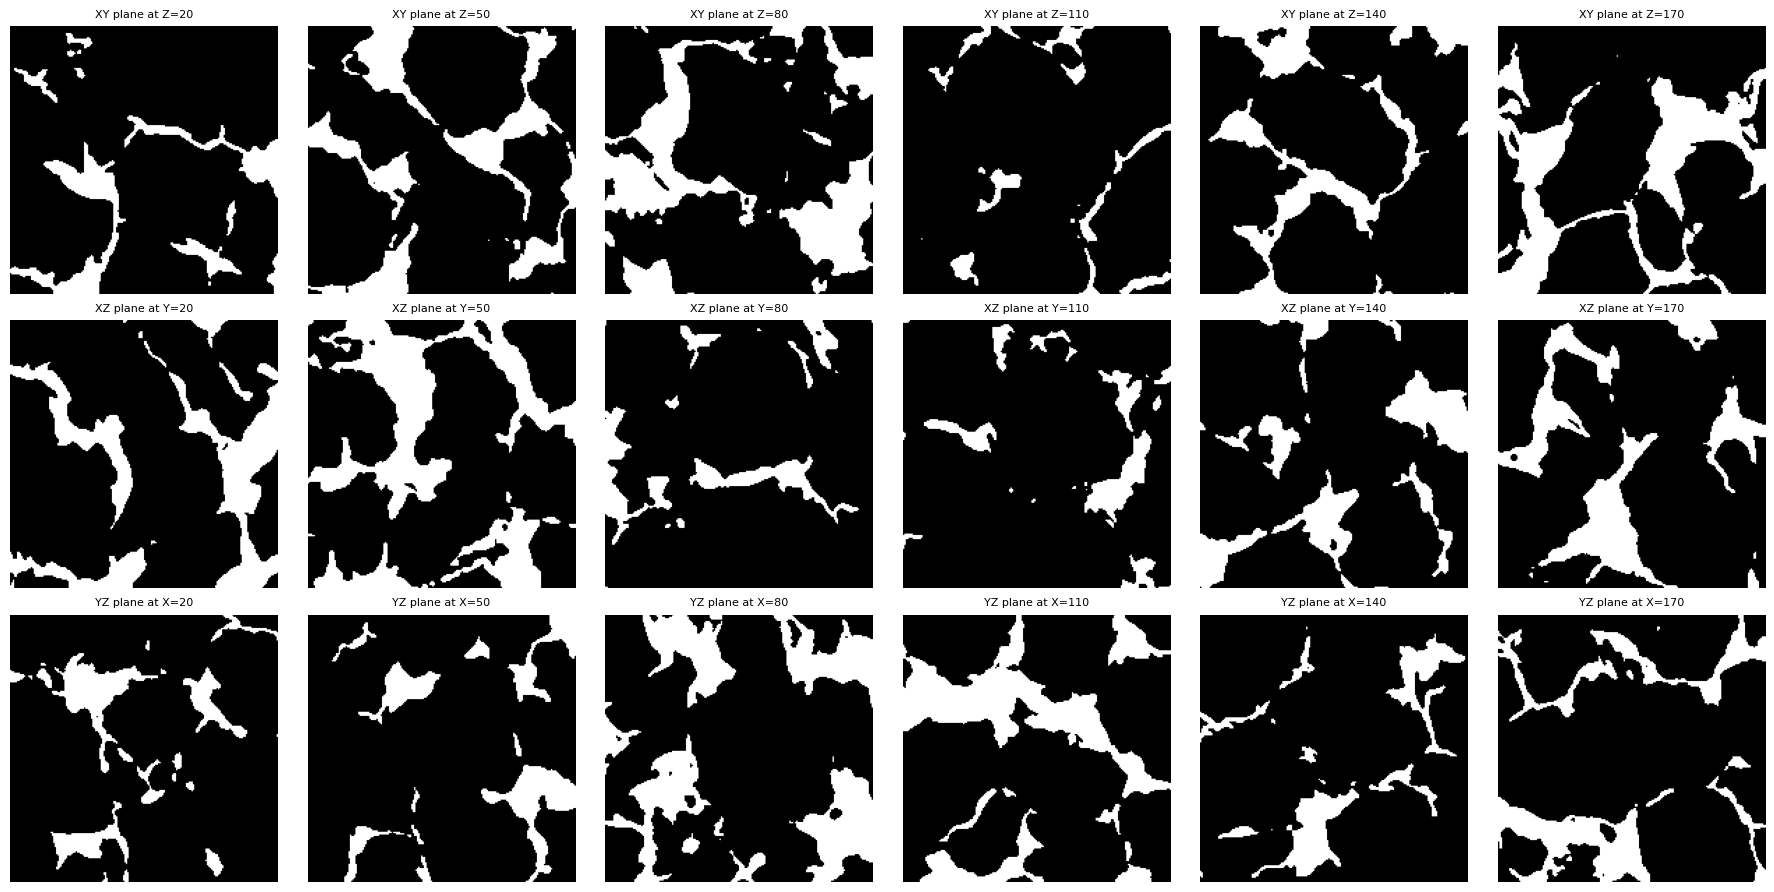

In [7]:
def visualize_planes_grid_single(img_arr):
    """
    Visualizes 2D slices from a single 3D image in a 3x6 grid.
    
    Parameters:
    img_arr (numpy.ndarray): A 3D numpy array with shape (196, 196, 196).
    """
    # Define the slice indices for visualization
    slice_indices = [20, 50, 80, 110, 140, 170]

    # Create a 3x6 grid for visualization
    fig, axs = plt.subplots(3, 6, figsize=(18, 9))

    for i in range(3):  # Three different planes
        for j in range(6):  # Six different slices
            slice_index = slice_indices[j]

            # Determine the plane and slice to display
            if i == 0:  # XY plane evolution
                slice_2d = img_arr[:, :, slice_index]
                title = f'XY plane at Z={slice_index}'
            elif i == 1:  # XZ plane evolution
                slice_2d = img_arr[:, slice_index, :]
                title = f'XZ plane at Y={slice_index}'
            else:  # YZ plane evolution
                slice_2d = img_arr[slice_index, :, :]
                title = f'YZ plane at X={slice_index}'

            # Display the 2D slice
            axs[i, j].imshow(slice_2d, cmap='gray')
            axs[i, j].set_title(title, fontsize=8)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()

sample_idx = 0
img_origin = img_data[sample_idx]['original']
visualize_planes_grid_single(img_origin)




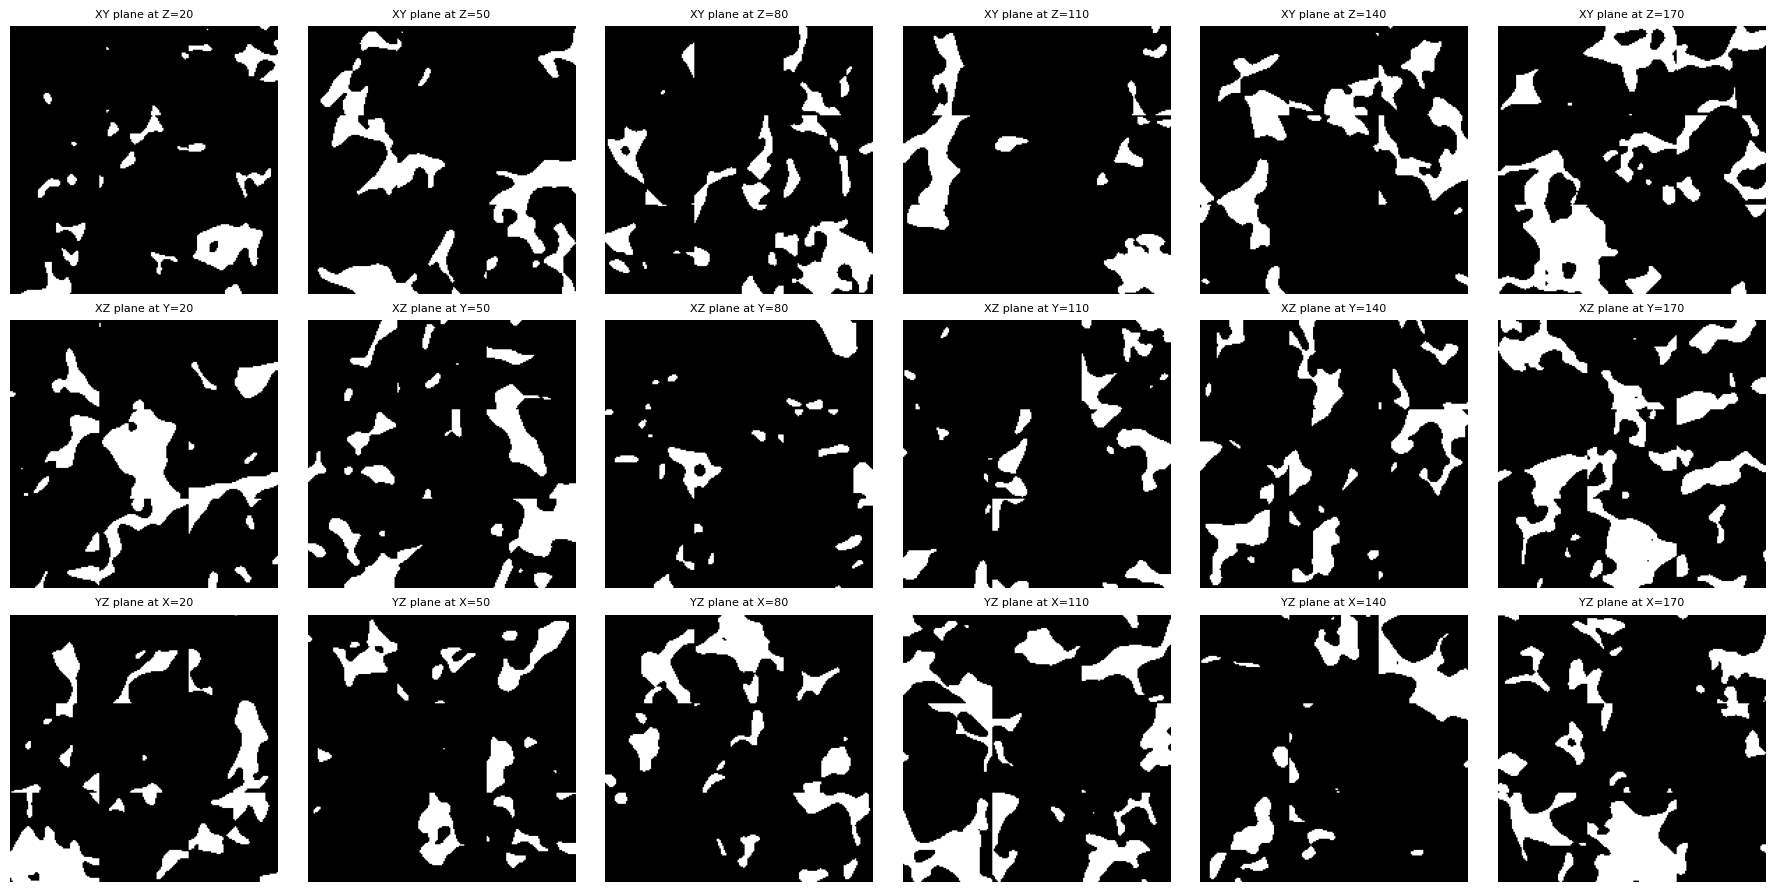

In [18]:
sample_idx_generate = 20
img_gen = img_data[sample_idx]['generate'][sample_idx_generate]

visualize_planes_grid_single(img_gen)